Fuzzy c-means (FCM) is a method of clustering which allows one piece of data to belong to two or more clusters. 

In [76]:
import pandas as pd 
import numpy as np
import random
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal    

In [109]:
df_full = pd.read_csv("Iris.csv") 

In [111]:
df_full.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [79]:
df_full = df_full.drop(['Id'], axis=1)

In [80]:
df_full.shape

(150, 5)

In [81]:
columns = list(df_full.columns)
features = columns[:len(columns)-1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]

In [113]:
columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [82]:
k = 3
MAX_ITER = 100
n = len(df)
m = 1.7 

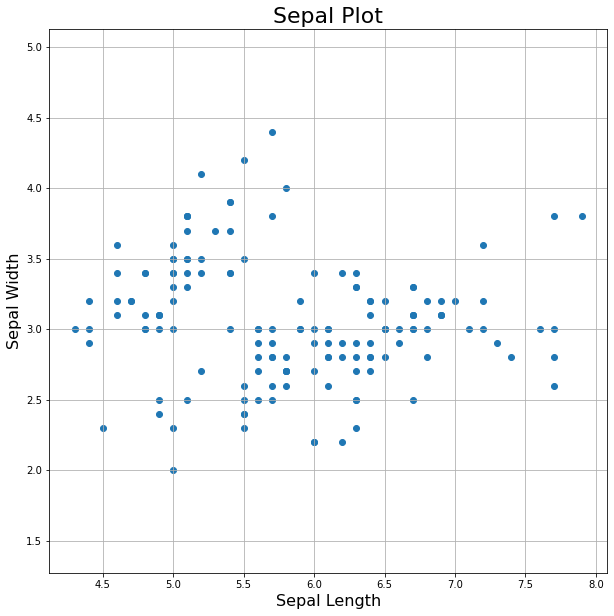

In [83]:
plt.figure(figsize=(10,10))                                             
plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

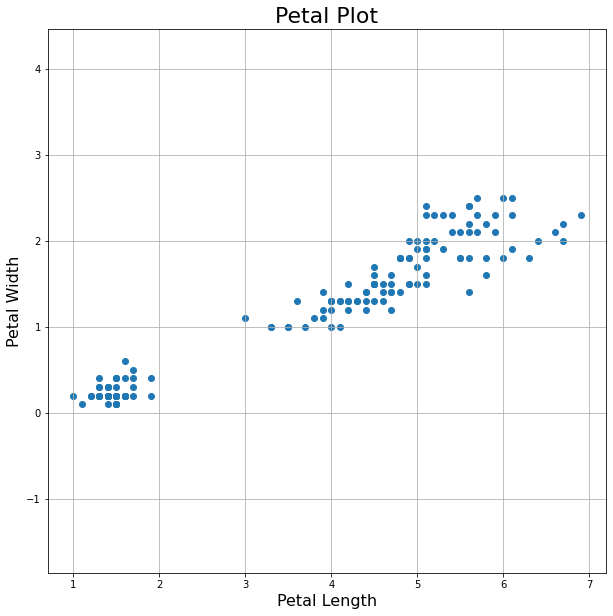

In [84]:
plt.figure(figsize=(10,10))                                            
plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

In [85]:
def accuracy(cluster_labels, class_labels):
    correct_pred = 0
    seto = max(set(labels[0:50]), key=labels[0:50].count)
    vers = max(set(labels[50:100]), key=labels[50:100].count)
    virg = max(set(labels[100:]), key=labels[100:].count)
    
    for i in range(len(df)):
        if cluster_labels[i] == seto and class_labels[i] == 'Iris-setosa':
            correct_pred = correct_pred + 1
        if cluster_labels[i] == vers and class_labels[i] == 'Iris-versicolor' and vers!=seto:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == virg and class_labels[i] == 'Iris-virginica' and virg!=seto and virg!=vers:
            correct_pred = correct_pred + 1
            
    accuracy = (correct_pred/len(df))*100
    return accuracy

# Initialize membership matrix

In [86]:
def initializeMembershipMatrix(): 
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        
        flag = temp_list.index(max(temp_list))
        for j in range(0,len(temp_list)):
            if(j == flag):
                temp_list[j] = 1
            else:
                temp_list[j] = 0
        
        membership_mat.append(temp_list)
    return membership_mat

In [87]:
membership_mat = initializeMembershipMatrix()

In [114]:
membership_mat

[[1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0,

# Calculating Cluster Center

In [88]:
def calculateClusterCenter(membership_mat): 
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [p ** m for p in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, list(zip(*temp_num)))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [89]:
calculateClusterCenter(membership_mat)

[[5.696153846153845,
  2.9538461538461545,
  3.6076923076923078,
  1.1269230769230767],
 [6.05, 3.1136363636363638, 3.965909090909091, 1.2840909090909092],
 [5.816666666666666, 3.101851851851853, 3.735185185185184, 1.1981481481481477]]

In [90]:
def updateMembershipValue(membership_mat, cluster_centers): 
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

In [91]:
def getClusters(membership_mat): 
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

In [92]:
def fuzzyCMeansClustering(): 
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        
        acc.append(cluster_labels)
        
        if(curr == 0):
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        curr += 1
    print("---------------------------")
    print("Partition matrix:")
    print(np.array(membership_mat))
    return cluster_labels, cluster_centers, acc

# Calculating the Accuracy

In [93]:
labels, centers, acc = fuzzyCMeansClustering()
a = accuracy(labels, class_labels)

Cluster Centers:
[[5.76222222 3.08222222 3.59111111 1.11333333]
 [5.82857143 3.14285714 3.60408163 1.14081633]
 [5.92142857 2.95357143 4.02857143 1.31785714]]
---------------------------
Partition matrix:
[[9.99770794e-01 1.72424329e-04 5.67819162e-05]
 [9.96289054e-01 2.82446451e-03 8.86481003e-04]
 [9.97101689e-01 2.17929773e-03 7.19013163e-04]
 [9.94099369e-01 4.49283135e-03 1.40779918e-03]
 [9.99514701e-01 3.63741759e-04 1.21557690e-04]
 [9.82814052e-01 1.29758903e-02 4.21005758e-03]
 [9.96935703e-01 2.30718744e-03 7.57109076e-04]
 [9.99988930e-01 8.40484306e-06 2.66508464e-06]
 [9.81705950e-01 1.38351228e-02 4.45892768e-03]
 [9.97732122e-01 1.72962558e-03 5.38252020e-04]
 [9.94108059e-01 4.41894904e-03 1.47299186e-03]
 [9.99223933e-01 5.91849425e-04 1.84218020e-04]
 [9.95029147e-01 3.77067942e-03 1.20017378e-03]
 [9.78743610e-01 1.57289028e-02 5.52748695e-03]
 [9.62915366e-01 2.67674268e-02 1.03172071e-02]
 [9.34117495e-01 4.74741073e-02 1.84083981e-02]
 [9.87557694e-01 9.16970181

In [94]:
acc_lis = [] 
for i in range(0,len(acc)):
    val = accuracy(acc[i], class_labels)
    acc_lis.append(val)

In [95]:
acc_lis = np.array(acc_lis) 
print("mean=",np.mean(acc_lis))
print("Std dev=",np.std(acc_lis))

mean= 87.83999999999996
Std dev= 4.230177301248733


In [96]:
print("Accuracy = " + str(round(a, 2)))

Accuracy = 88.67


In [97]:
print("Cluster center vectors:") 
print(np.array(centers))

Cluster center vectors:
[[5.00525867 3.40761295 1.48051039 0.25084584]
 [5.8877322  2.75271885 4.36949728 1.40585918]
 [6.80722429 3.05991213 5.68331178 2.06091097]]


# Final clusters graph

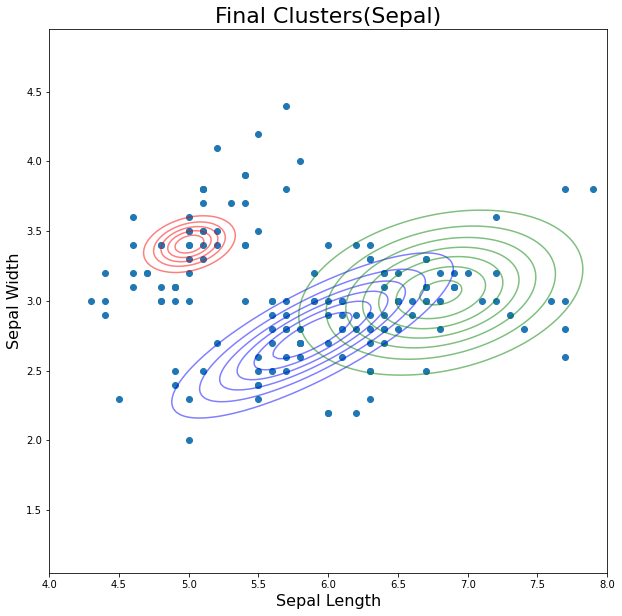

In [108]:
x1 = np.linspace(4,8,150)  
x2 = np.linspace(1.5,4.5,150)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(s_mean_clus1, cov_seto)  
Z2 = multivariate_normal(s_mean_clus2, cov_vers)
Z3 = multivariate_normal(s_mean_clus3, cov_virg)

pos = np.empty(X.shape + (2,))               
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                         
plt.scatter(sepal_df[:,0], sepal_df[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                              
plt.ylabel('Sepal Width', fontsize=16)                                               
plt.title('Final Clusters(Sepal)', fontsize=22)                                          
# plt.grid()                                                                      
plt.show()

In [99]:
p_mean_clus1 = np.array([centers[seto][2],centers[seto][3]])
p_mean_clus2 = np.array([centers[vers][2],centers[vers][3]])
p_mean_clus3 = np.array([centers[virg][2],centers[virg][3]])

In [100]:
petal_df = df_full.iloc[:,2:4]

In [101]:
seto_df = petal_df[petal_df.index.isin(ind_seto)]
vers_df = petal_df[petal_df.index.isin(ind_vers)]
virg_df = petal_df[petal_df.index.isin(ind_virg)]

In [102]:
cov_seto = np.cov(np.transpose(np.array(seto_df)))
cov_vers = np.cov(np.transpose(np.array(vers_df)))
cov_virg = np.cov(np.transpose(np.array(virg_df)))

In [103]:
petal_df = np.array(petal_df)

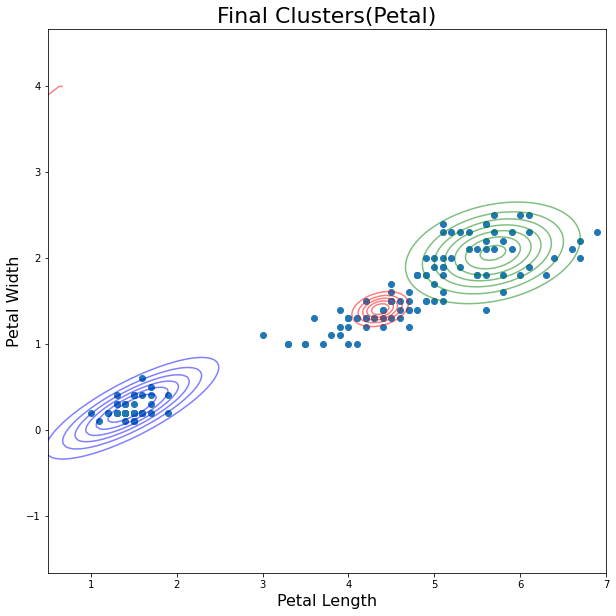

In [107]:
x1 = np.linspace(0.5,7,150)  
x2 = np.linspace(-1,4,150)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(p_mean_clus1, cov_seto)  
Z2 = multivariate_normal(p_mean_clus2, cov_vers)
Z3 = multivariate_normal(p_mean_clus3, cov_virg)

pos = np.empty(X.shape + (2,))              
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                
plt.scatter(petal_df[:,0], petal_df[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                  
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Final Clusters(Petal)', fontsize=22)                                          
# plt.grid()                                                                         
plt.show()

### Thanking you
<h6 align='right'> -Tag J</h6>